<a href="https://colab.research.google.com/github/quentaurus/EsterFun/blob/master/Mandelbrot002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

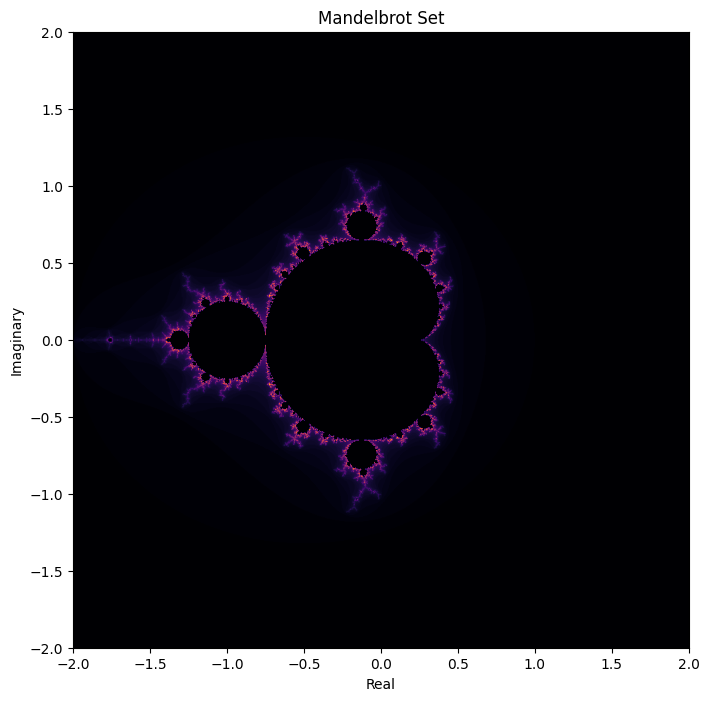

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Set the limits and resolution of the plot
xmin, xmax, ymin, ymax = -2, 2, -2, 2
resolution = 1000

# Create a grid of complex numbers
x = np.linspace(xmin, xmax, resolution)
y = np.linspace(ymin, ymax, resolution)
xx, yy = np.meshgrid(x, y)
c = xx + yy * 1j

# Initialize the output matrix
output = np.zeros(c.shape)

# Set the maximum number of iterations
max_iterations = 100

# Create the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Define the update function for the plot
def update(xmin, xmax, ymin, ymax):
    # Create a new grid of complex numbers
    x = np.linspace(xmin, xmax, resolution)
    y = np.linspace(ymin, ymax, resolution)
    xx, yy = np.meshgrid(x, y)
    c = xx + yy * 1j

    # Initialize the output matrix
    output = np.zeros(c.shape)

    # Iterate the Mandelbrot set formula
    z = c
    for i in range(max_iterations):
        z = z**2 + c
        diverged = np.abs(z) > 2
        output[diverged] = i
        z[diverged] = np.nan

    # Plot the output matrix
    ax.clear()
    ax.imshow(output, cmap='inferno', extent=(xmin, xmax, ymin, ymax))
    ax.set_title('Mandelbrot Set')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    fig.canvas.draw()

# Define the mouse event function
def on_mouse_event(event):
    if event.button == 1:
        xmin, xmax, ymin, ymax = ax.axis()
        x, y = event.xdata, event.ydata
        x_width = xmax - xmin
        y_width = ymax - ymin
        xmin = x - x_width / 4
        xmax = x + x_width / 4
        ymin = y - y_width / 4
        ymax = y + y_width / 4
        update(xmin, xmax, ymin, ymax)

# Connect the mouse event function to the figure
fig.canvas.mpl_connect('button_press_event', on_mouse_event)

# Plot the initial Mandelbrot set
update(xmin, xmax, ymin, ymax)

# Show the plot
plt.show()
